In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL= 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [4]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 3s 0us/step


In [5]:
import os

In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
base_dir
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [7]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [8]:
num_cats_tr = len(os.listdir(train_cats_dir ))
num_dogs_tr = len(os.listdir(train_dogs_dir ))
num_cats_val = len(os.listdir(validation_cats_dir ))
num_dogs_val = len(os.listdir(validation_dogs_dir ))


total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
num_cats_tr

1000

In [10]:
num_dogs_tr

1000

In [11]:
num_cats_val

500

In [12]:
num_dogs_val

500

In [13]:
BATCH_SIZE=100
IMG_SHAPE=150

In [14]:
import matplotlib.pyplot as plt
def plotImages(image_arr):
  fig, axes = plt.subplots(1,5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(image_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [15]:
image_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_data_generator = image_gen.flow_from_directory(batch_size=BATCH_SIZE,directory=train_dir,shuffle=True,target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


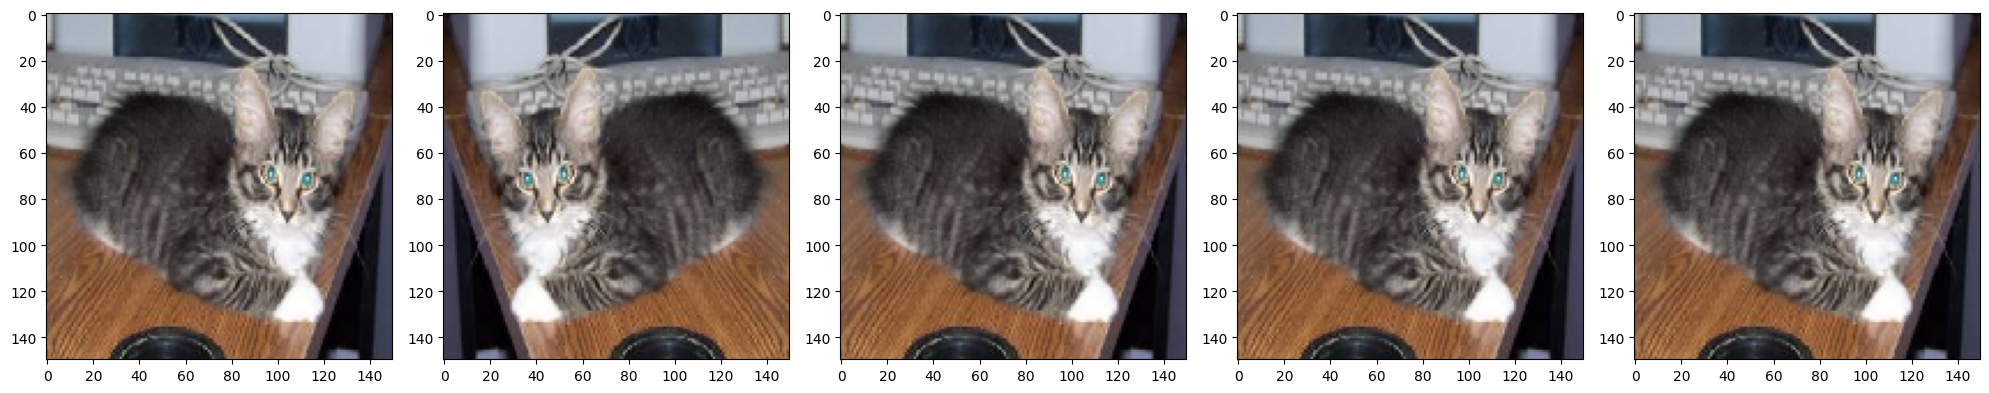

In [16]:
augmented_images = [train_data_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [17]:
image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               zoom_range=0.2,
                               shear_range=0.2,
                               height_shift_range=0.2,
                               width_shift_range=0.2,
                               rotation_range=40)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='binary'
                                               )

Found 2000 images belonging to 2 classes.


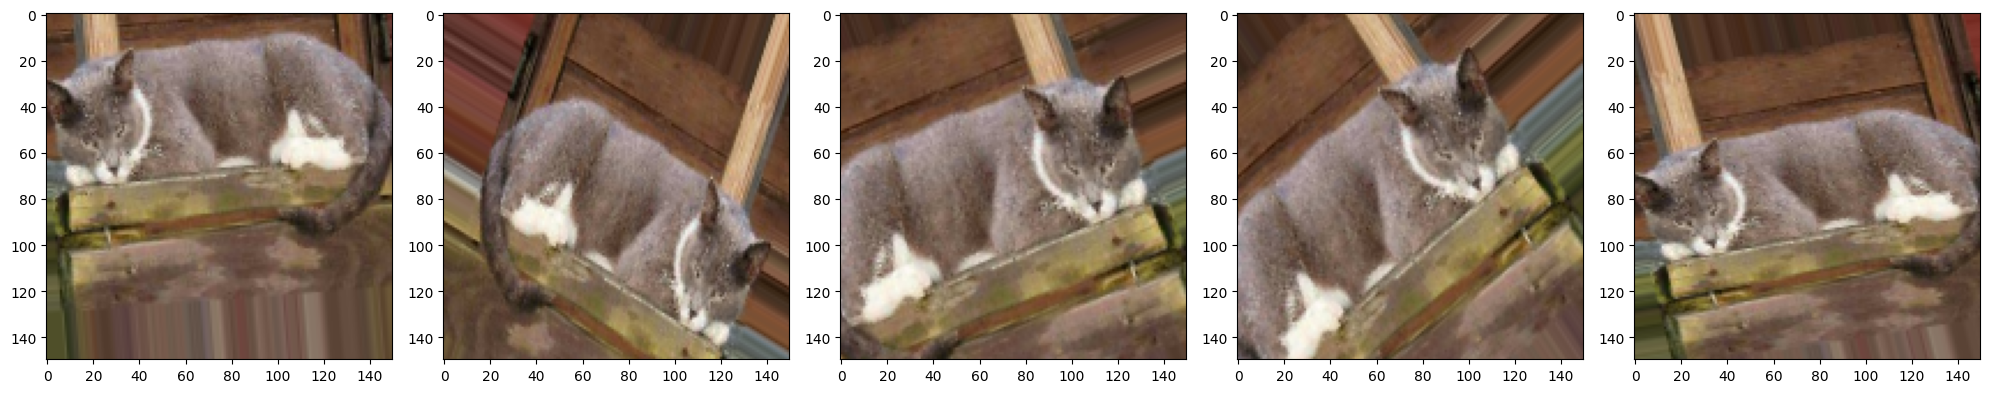

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
image_gen_val = ImageDataGenerator(rescale=1./255,)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=validation_dir,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='binary'
                                               )

Found 1000 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2)
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=100
import numpy as np

history=model.fit_generator(train_data_gen,
                            steps_per_epoch=int(np.ceil(total_train/BATCH_SIZE)),
                            epochs=epochs,
                            validation_data=val_data_gen,
                            validation_steps=int(np.ceil(total_val/BATCH_SIZE))
                            )


<ipython-input-25-77d9fa945dbe>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data_gen,


Epoch 1/100
20/20 [==============================] - 30s 744ms/step - loss: 0.7188 - accuracy: 0.4890 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 15s 756ms/step - loss: 0.6925 - accuracy: 0.5405 - val_loss: 0.6879 - val_accuracy: 0.5840
Epoch 3/100
20/20 [==============================] - 15s 748ms/step - loss: 0.6903 - accuracy: 0.5175 - val_loss: 0.6856 - val_accuracy: 0.6040
Epoch 4/100
20/20 [==============================] - 17s 824ms/step - loss: 0.6768 - accuracy: 0.5805 - val_loss: 0.6441 - val_accuracy: 0.6120
Epoch 5/100
20/20 [==============================] - 15s 765ms/step - loss: 0.6757 - accuracy: 0.5895 - val_loss: 0.6340 - val_accuracy: 0.6430
Epoch 6/100
20/20 [==============================] - 15s 744ms/step - loss: 0.6525 - accuracy: 0.6070 - val_loss: 0.6090 - val_accuracy: 0.6840
Epoch 7/100
20/20 [==============================] - 15s 736ms/step - loss: 0.6460 - accuracy: 0.6075 - val_loss: 0.6272 - val_accuracy:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
28*32


896

In [43]:
64*((3*3*32)+1)

18496

In [42]:
(32*150*150*3)+(32)

2160032